# Loading data For Training 
# Total Features : 12
# Target Feature : Disruption Types

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import gc
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

class_path='C:\\Users\\HP\\OneDrive\\AppData\\Desktop\\!!74 pr\\src\\Flight_classification_data.csv'
df=pd.read_csv(class_path)
features = [
    'DayOfWeek',
    'DayofMonth',
    'Month',
    'Distance',
    'CRSDepMin',
    'CRSArrMin',
    'ScheduledElapsedTime',
    'OriginReliability',
    'DestReliability',
    'CarrierReliability',
    'DepTimeOfDay_enc',
    'ArrTimeOfDay_enc'
]
target = 'DisruptionType'



X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)


# APPLYING 4 STAGE ONE V REST APPROACH AND THEN COMBINING PROBABILITIES FOR FURTHER CLASSIFICATION

In [6]:
def get_positive_proba(model, X):
    """
    Safely return probability of positive class (1)
    even if the model was trained on a single class.
    """
    proba = model.predict_proba(X)
    if proba.shape[1] == 2:
        return proba[:, 1]
    else:
        # Model saw only one class → probability = 1.0
        return np.ones(proba.shape[0])

# ON TIME VS REST 
# Train Accuracy : 93%
# Test Accuracy  : 71%
# ROC-AUC Test  : 0.7668839808666668
# Precision     : 0.4482513231827549
# Recall        : 0.6047
# F1-Score      : 0.5148530025287141


Training OvR Extra Trees for class: On Time
Train class distribution: [599999 200000]
Test  class distribution: [150000  50000]

METRICS
Train Accuracy : 0.9325336656670821
Test Accuracy  : 0.715095
ROC-AUC Test  : 0.7668839808666668
Precision     : 0.4482513231827549
Recall        : 0.6047
F1-Score      : 0.5148530025287141


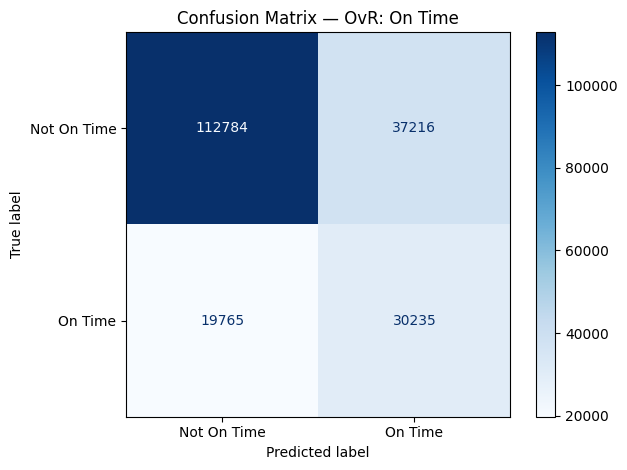

Model saved → ovr_extratrees_On Time.joblib


4988

In [ ]:

CLASS_NAME = "On Time"  

print(f"\nTraining OvR Extra Trees for class: {CLASS_NAME}")

# -----------------------------
# BINARY TARGET
# -----------------------------
y_train_bin = (y_train == CLASS_NAME).astype(int)
y_test_bin  = (y_test  == CLASS_NAME).astype(int)

print("Train class distribution:", np.bincount(y_train_bin))
print("Test  class distribution:", np.bincount(y_test_bin))

# -----------------------------
# MODEL
# -----------------------------
model = ExtraTreesClassifier(
    n_estimators=120,
    max_features="sqrt",
    max_depth=27,
    class_weight={0:1, 1:6},
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# TRAIN
# -----------------------------
model.fit(X_train, y_train_bin)

# -----------------------------
# PREDICT
# -----------------------------
train_preds = model.predict(X_train)
test_preds  = model.predict(X_test)

train_probs = get_positive_proba(model, X_train)
test_probs  = get_positive_proba(model, X_test)

# -----------------------------
# METRICS
# -----------------------------
print("\nMETRICS")
print("Train Accuracy :", accuracy_score(y_train_bin, train_preds))
print("Test Accuracy  :", accuracy_score(y_test_bin, test_preds))

# ROC only makes sense if both classes exist
if len(np.unique(y_test_bin)) == 2:
    print("ROC-AUC Test  :", roc_auc_score(y_test_bin, test_probs))
else:
    print("ROC-AUC Test  : skipped (single class present)")

print("Precision     :", precision_score(y_test_bin, test_preds, zero_division=0))
print("Recall        :", recall_score(y_test_bin, test_preds, zero_division=0))
print("F1-Score      :", f1_score(y_test_bin, test_preds, zero_division=0))

# -----------------------------
# CONFUSION MATRIX
# -----------------------------
cm = confusion_matrix(y_test_bin, test_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[f"Not {CLASS_NAME}", CLASS_NAME]
)

disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — OvR: {CLASS_NAME}")
plt.tight_layout()
plt.show()

# -----------------------------
# SAVE MODEL
# -----------------------------
path = f"ovr_extratrees_{CLASS_NAME}.joblib"
joblib.dump(model, path)
print(f"Model saved → {path}")

# -----------------------------
# FREE MEMORY
# -----------------------------
del model, train_preds, test_preds, train_probs, test_probs
gc.collect()

# DELAYED V REST
# Train Accuracy : 93%
# Test Accuracy  : 71%
# ROC-AUC Test  : 0.7667542976
# Precision     : 0.4467067543000979
# Recall        : 0.63888
# F1-Score      : 0.5257838860999094


Training OvR Extra Trees for class: Delayed
Train class distribution: [600000 199999]
Test  class distribution: [150000  50000]

METRICS
Train Accuracy : 0.9377311721639652
Test Accuracy  : 0.71189
ROC-AUC Test  : 0.7667542976
Precision     : 0.4467067543000979
Recall        : 0.63888
F1-Score      : 0.5257838860999094


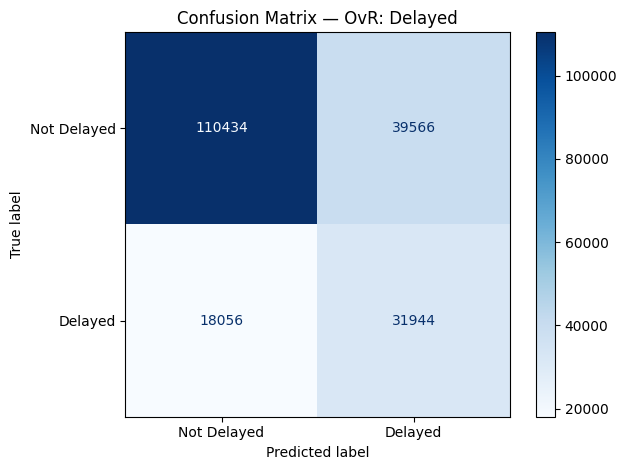

Model saved → ovr_extratrees_Delayed.joblib


5452

In [ ]:

CLASS_NAME = "Delayed"   

print(f"\nTraining OvR Extra Trees for class: {CLASS_NAME}")

# -----------------------------
# BINARY TARGET
# -----------------------------
y_train_bin = (y_train == CLASS_NAME).astype(int)
y_test_bin  = (y_test  == CLASS_NAME).astype(int)

print("Train class distribution:", np.bincount(y_train_bin))
print("Test  class distribution:", np.bincount(y_test_bin))

# -----------------------------
# MODEL
# -----------------------------


model = ExtraTreesClassifier(
    n_estimators=120,
    max_features="sqrt",
    max_depth=27,
    class_weight={0:1, 1:6},
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# TRAIN
# -----------------------------
model.fit(X_train, y_train_bin)

# -----------------------------
# PREDICT
# -----------------------------
train_preds = model.predict(X_train)
test_preds  = model.predict(X_test)

train_probs = get_positive_proba(model, X_train)
test_probs  = get_positive_proba(model, X_test)

# -----------------------------
# METRICS
# -----------------------------
print("\nMETRICS")
print("Train Accuracy :", accuracy_score(y_train_bin, train_preds))
print("Test Accuracy  :", accuracy_score(y_test_bin, test_preds))

# ROC only makes sense if both classes exist
if len(np.unique(y_test_bin)) == 2:
    print("ROC-AUC Test  :", roc_auc_score(y_test_bin, test_probs))
else:
    print("ROC-AUC Test  : skipped (single class present)")

print("Precision     :", precision_score(y_test_bin, test_preds, zero_division=0))
print("Recall        :", recall_score(y_test_bin, test_preds, zero_division=0))
print("F1-Score      :", f1_score(y_test_bin, test_preds, zero_division=0))

# -----------------------------
# CONFUSION MATRIX
# -----------------------------
cm = confusion_matrix(y_test_bin, test_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[f"Not {CLASS_NAME}", CLASS_NAME]
)

disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — OvR: {CLASS_NAME}")
plt.tight_layout()
plt.show()

# -----------------------------
# SAVE MODEL
# -----------------------------
path = f"ovr_extratrees_{CLASS_NAME}.joblib"
joblib.dump(model, path)
print(f"Model saved → {path}")

# -----------------------------
# FREE MEMORY
# -----------------------------
del model, train_preds, test_preds, train_probs, test_probs
gc.collect()

# DIVERTED V REST
# Train Accuracy : 99%
# Test Accuracy  : 99%
# ROC-AUC Test  : 0.9999037628666667
# Precision     : 0.9962319071733323
# Recall        : 0.99938
# F1-Score      : 0.9978034705165838


Training OvR Extra Trees for class: Diverted
Train class distribution: [599999 200000]
Test  class distribution: [150000  50000]

METRICS
Train Accuracy : 0.9999812499765625
Test Accuracy  : 0.9989
ROC-AUC Test  : 0.9999037628666667
Precision     : 0.9962319071733323
Recall        : 0.99938
F1-Score      : 0.9978034705165838


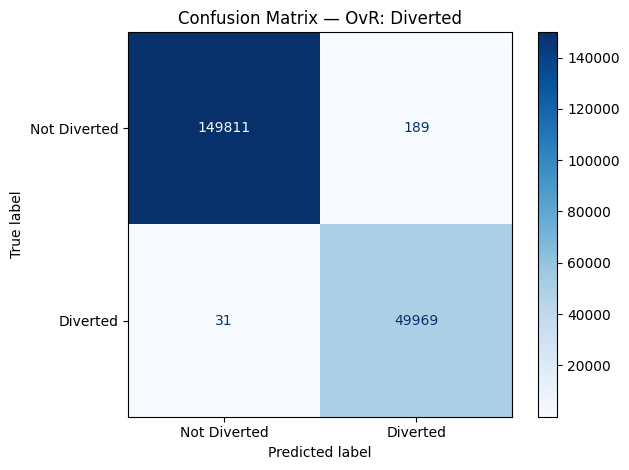

Model saved → ovr_extratrees_Diverted.joblib


5195

In [ ]:

CLASS_NAME = "Diverted" 

print(f"\nTraining OvR Extra Trees for class: {CLASS_NAME}")

# -----------------------------
# BINARY TARGET
# -----------------------------
y_train_bin = (y_train == CLASS_NAME).astype(int)
y_test_bin  = (y_test  == CLASS_NAME).astype(int)

print("Train class distribution:", np.bincount(y_train_bin))
print("Test  class distribution:", np.bincount(y_test_bin))

# -----------------------------
# MODEL
# -----------------------------
model = ExtraTreesClassifier(
    n_estimators=200,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# TRAIN
# -----------------------------
model.fit(X_train, y_train_bin)

# -----------------------------
# PREDICT
# -----------------------------
train_preds = model.predict(X_train)
test_preds  = model.predict(X_test)

train_probs = get_positive_proba(model, X_train)
test_probs  = get_positive_proba(model, X_test)

# -----------------------------
# METRICS
# -----------------------------
print("\nMETRICS")
print("Train Accuracy :", accuracy_score(y_train_bin, train_preds))
print("Test Accuracy  :", accuracy_score(y_test_bin, test_preds))

# ROC only makes sense if both classes exist
if len(np.unique(y_test_bin)) == 2:
    print("ROC-AUC Test  :", roc_auc_score(y_test_bin, test_probs))
else:
    print("ROC-AUC Test  : skipped (single class present)")

print("Precision     :", precision_score(y_test_bin, test_preds, zero_division=0))
print("Recall        :", recall_score(y_test_bin, test_preds, zero_division=0))
print("F1-Score      :", f1_score(y_test_bin, test_preds, zero_division=0))

# -----------------------------
# CONFUSION MATRIX
# -----------------------------
cm = confusion_matrix(y_test_bin, test_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[f"Not {CLASS_NAME}", CLASS_NAME]
)

disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — OvR: {CLASS_NAME}")
plt.tight_layout()
plt.show()

# -----------------------------
# SAVE MODEL
# -----------------------------
path = f"ovr_extratrees_{CLASS_NAME}.joblib"
joblib.dump(model, path)
print(f"Model saved → {path}")

# -----------------------------
# FREE MEMORY
# -----------------------------
del model, train_preds, test_preds, train_probs, test_probs
gc.collect()

# CANCELLED V REST
# Train Accuracy : 99%
# Test Accuracy  : 90%
# ROC-AUC Test  : 0.9186148384666667
# Precision     : 0.9306247269550022
# Recall        : 0.63906
# F1-Score      : 0.7577636805596727


Training OvR Extra Trees for class: Cancelled
Train class distribution: [599999 200000]
Test  class distribution: [150000  50000]

METRICS
Train Accuracy : 0.9999337499171874
Test Accuracy  : 0.897855
ROC-AUC Test  : 0.9186148384666667
Precision     : 0.9306247269550022
Recall        : 0.63906
F1-Score      : 0.7577636805596727


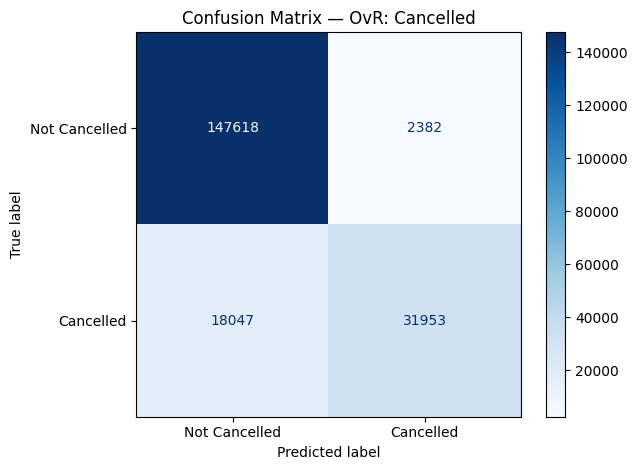

Model saved → ovr_extratrees_Cancelled.joblib


5195

In [ ]:
CLASS_NAME = "Cancelled"  

print(f"\nTraining OvR Extra Trees for class: {CLASS_NAME}")

# BINARY TARGET
y_train_bin = (y_train == CLASS_NAME).astype(int)
y_test_bin  = (y_test  == CLASS_NAME).astype(int)

print("Train class distribution:", np.bincount(y_train_bin))
print("Test  class distribution:", np.bincount(y_test_bin))

# MODEL
model = ExtraTreesClassifier(
    n_estimators=200,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# TRAIN
model.fit(X_train, y_train_bin)

# PREDICT
train_preds = model.predict(X_train)
test_preds  = model.predict(X_test)

train_probs = get_positive_proba(model, X_train)
test_probs  = get_positive_proba(model, X_test)

# METRICS
print("\nMETRICS")
print("Train Accuracy :", accuracy_score(y_train_bin, train_preds))
print("Test Accuracy  :", accuracy_score(y_test_bin, test_preds))

# ROC only makes sense if both classes exist
if len(np.unique(y_test_bin)) == 2:
    print("ROC-AUC Test  :", roc_auc_score(y_test_bin, test_probs))
else:
    print("ROC-AUC Test  : skipped (single class present)")

print("Precision     :", precision_score(y_test_bin, test_preds, zero_division=0))
print("Recall        :", recall_score(y_test_bin, test_preds, zero_division=0))
print("F1-Score      :", f1_score(y_test_bin, test_preds, zero_division=0))

# CONFUSION MATRIX
cm = confusion_matrix(y_test_bin, test_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[f"Not {CLASS_NAME}", CLASS_NAME]
)

disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — OvR: {CLASS_NAME}")
plt.tight_layout()
plt.show()

# SAVE MODEL
path = f"ovr_extratrees_{CLASS_NAME}.joblib"
joblib.dump(model, path)
print(f"Model saved → {path}")

# FREE MEMORY
del model, train_preds, test_preds, train_probs, test_probs
gc.collect()

# Pipeline to use 4 stage OVR models for final multiclass classification
# 1. Get Probabilities from each model 
# 2. Apply Softmax to normalize the probabilities
# 3. Apply Argmax function for final classification output
# Accuracy = 70%
# Good for classifying over diverted and cancelled class 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
class_path='C:\\Users\\HP\\OneDrive\\AppData\\Desktop\\!!74 pr\\src\\Flight_classification_data.csv'
df=pd.read_csv(class_path)
features = [
    'DayOfWeek',
    'DayofMonth',
    'Month',
    'Distance',
    'CRSDepMin',
    'CRSArrMin',
    'ScheduledElapsedTime',
    'OriginReliability',
    'DestReliability',
    'CarrierReliability',
    'DepTimeOfDay_enc',
    'ArrTimeOfDay_enc'
]
target = 'DisruptionType'


X = df[features]
y = df[target]





Accuracy:
0.694955

Classification Report:

              precision    recall  f1-score   support

   Cancelled       0.90      0.65      0.76     50000
    Diverted       0.99      1.00      1.00     50000
     Delayed       0.49      0.58      0.54     50000
     On Time       0.50      0.55      0.52     50000

    accuracy                           0.69    200000
   macro avg       0.72      0.69      0.70    200000
weighted avg       0.72      0.69      0.70    200000



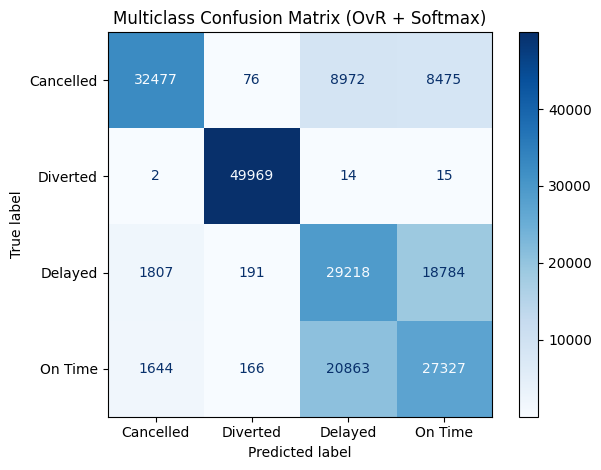

ROC-AUC (macro)   : 0.8873144297666666
ROC-AUC (weighted): 0.8873144297666667


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import gc

from scipy.special import softmax
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)

# ======================================================
# 1. CLEAN TRUE LABELS (MATCH FILE NAMES)
# ======================================================
y_test_clean = (
    pd.Series(y_test)
    .astype(str)
    .str.strip()
    .values
)

CLASS_ORDER = ["Cancelled", "Diverted", "Delayed", "On Time"]
n_samples = len(X_test)

# ======================================================
# 2. SAFE PROBABILITY FUNCTION
# ======================================================
def safe_positive_proba(model, X):
    proba = model.predict_proba(X)
    if proba.shape[1] == 2:
        return proba[:, 1]
    return np.ones(len(X))

# ======================================================
# 3. PREALLOCATE SCORE MATRIX
# ======================================================
scores = np.zeros((n_samples, 4), dtype=np.float32)

# ======================================================
# 4. LOAD + INFER ONE MODEL AT A TIME
# ======================================================

# ---- CANCELLED ----
model = joblib.load("C:\\Users\\HP\OneDrive\\AppData\\Desktop\\!!74 pr\\models\\OneVRest_models\\ovr_extratrees_Cancelled.joblib")
scores[:, 0] = safe_positive_proba(model, X_test)
del model
gc.collect()

# ---- DIVERTED ----
model = joblib.load("C:\\Users\\HP\OneDrive\\AppData\\Desktop\\!!74 pr\\models\\OneVRest_models\\ovr_extratrees_Diverted.joblib")
scores[:, 1] = safe_positive_proba(model, X_test)
del model
gc.collect()

# ---- DELAYED ----
model = joblib.load("C:\\Users\\HP\OneDrive\\AppData\\Desktop\\!!74 pr\\models\\OneVRest_models\\ovr_extratrees_Delayed.joblib")
scores[:, 2] = safe_positive_proba(model, X_test)
del model
gc.collect()

# ---- ON TIME ----
model = joblib.load("C:\\Users\\HP\OneDrive\\AppData\\Desktop\\!!74 pr\\models\\OneVRest_models\\ovr_extratrees_On Time.joblib")
scores[:, 3] = safe_positive_proba(model, X_test)
del model
gc.collect()

# ======================================================
# 5. SCORES → TRUE PROBABILITIES
# ======================================================
proba = softmax(scores, axis=1)
proba_df = pd.DataFrame(proba, columns=CLASS_ORDER)

# ======================================================
# 6. ARGMAX PREDICTION
# ======================================================
y_pred = proba_df.idxmax(axis=1).values

print("\n=====Testing metrics=====")

# ======================================================
# 7. ACCURACY
# ======================================================
print("\nAccuracy:")
print(accuracy_score(y_test_clean, y_pred))

# ======================================================
# 8. PRECISION / RECALL / F1
# ======================================================
print("\nClassification Report:\n")
print(
    classification_report(
        y_test_clean,
        y_pred,
        labels=CLASS_ORDER,
        zero_division=0
    )
)

# ======================================================
# 9. CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(
    y_test_clean,
    y_pred,
    labels=CLASS_ORDER
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=CLASS_ORDER
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Multiclass Confusion Matrix (OvR + Softmax)")
plt.tight_layout()
plt.show()

# ======================================================
# 10. MULTICLASS ROC-AUC (SAFE)
# ======================================================
present_classes = np.unique(y_test_clean)
present_idx = [CLASS_ORDER.index(c) for c in present_classes]

roc_macro = roc_auc_score(
    y_test_clean,
    proba[:, present_idx],
    labels=present_classes,
    multi_class="ovr",
    average="macro"
)

roc_weighted = roc_auc_score(
    y_test_clean,
    proba[:, present_idx],
    labels=present_classes,
    multi_class="ovr",
    average="weighted"
)

print("ROC-AUC (macro)   :", roc_macro)
print("ROC-AUC (weighted):", roc_weighted)

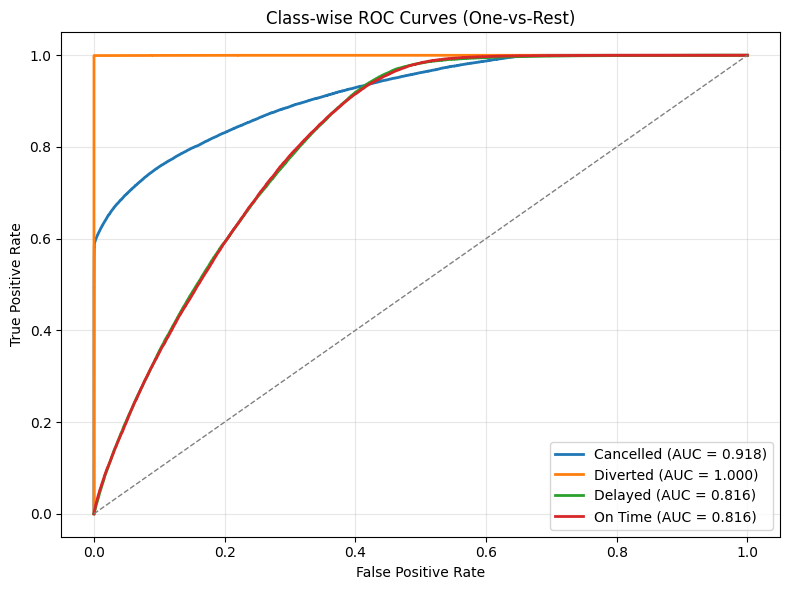

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# BINARIZE TRUE LABELS (OvR FORMAT)

y_bin = label_binarize(y_test_clean, classes=CLASS_ORDER)


# PLOT ROC CURVES

plt.figure(figsize=(8, 6))

for i, cls in enumerate(CLASS_ORDER):
    # Skip class if it has no positive samples
    if y_bin[:, i].sum() == 0:
        print(f"Skipping ROC for {cls} (no positive samples)")
        continue

    fpr, tpr, _ = roc_curve(y_bin[:, i], proba[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        lw=2,
        label=f"{cls} (AUC = {roc_auc:.3f})"
    )

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class-wise ROC Curves (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

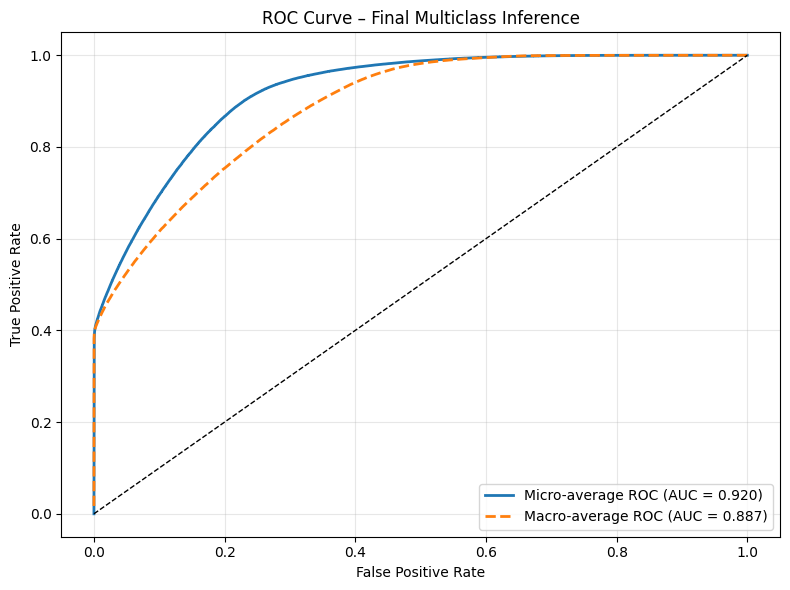

Micro-average ROC-AUC : 0.9199265215291667
Macro-average ROC-AUC : 0.8873182433666666


In [ ]:


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ======================================================
# 1. CLEAN TRUE LABELS
# ======================================================
y_test_clean = (
    pd.Series(y_test)
    .astype(str)
    .str.strip()
    .values
)

CLASS_ORDER = ["Cancelled", "Diverted", "Delayed", "On Time"]

# ======================================================
# 2. BINARIZE LABELS (OvR FORMAT)
# ======================================================
y_bin = label_binarize(y_test_clean, classes=CLASS_ORDER)

# ======================================================
# 3. MICRO-AVERAGE ROC (MAIN INFERENCE)
# ======================================================
fpr_micro, tpr_micro, _ = roc_curve(
    y_bin.ravel(),
    proba.ravel()
)
roc_auc_micro = auc(fpr_micro, tpr_micro)

# ======================================================
# 4. MACRO-AVERAGE ROC (MAIN INFERENCE)
# ======================================================
fpr = {}
tpr = {}
roc_auc = {}
valid_classes = []

for i, cls in enumerate(CLASS_ORDER):
    if y_bin[:, i].sum() == 0:
        continue  # skip absent classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    valid_classes.append(i)

# Aggregate FPR points
all_fpr = np.unique(
    np.concatenate([fpr[i] for i in valid_classes])
)

mean_tpr = np.zeros_like(all_fpr)

for i in valid_classes:
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(valid_classes)

roc_auc_macro = auc(all_fpr, mean_tpr)

# ======================================================
# 5. PLOT MAIN ROC CURVE
# ======================================================
plt.figure(figsize=(8, 6))

plt.plot(
    fpr_micro,
    tpr_micro,
    linewidth=2,
    label=f"Micro-average ROC (AUC = {roc_auc_micro:.3f})"
)

plt.plot(
    all_fpr,
    mean_tpr,
    linewidth=2,
    linestyle="--",
    label=f"Macro-average ROC (AUC = {roc_auc_macro:.3f})"
)

plt.plot([0, 1], [0, 1], "k--", lw=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final Multiclass Inference")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ======================================================
# 6. PRINT AUC VALUES
# ======================================================
print("Micro-average ROC-AUC :", roc_auc_micro)
print("Macro-average ROC-AUC :", roc_auc_macro)